# CASE STUDY ON UNSUPERVISED LEARNING
The Whole sale customer data is given
1. Read the dataset to the python environment.
2. Try out different clustering models in the Whole sale customer dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.
4. Perform PCA for Dimensionality reduction.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to the python environment.

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

### EDA and Feature Engineering

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
features = df.columns

<Figure size 432x288 with 0 Axes>

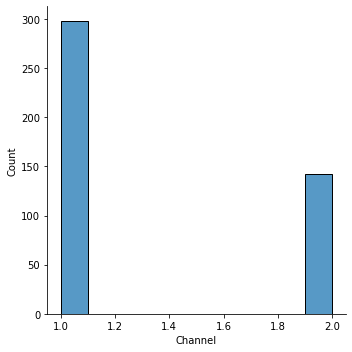

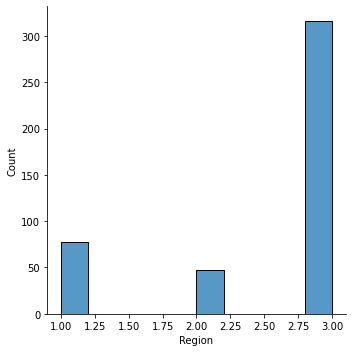

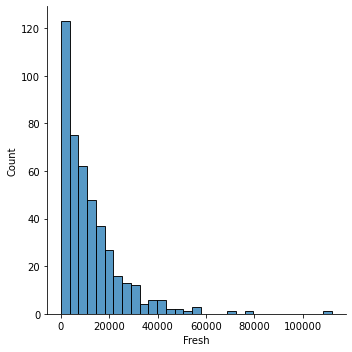

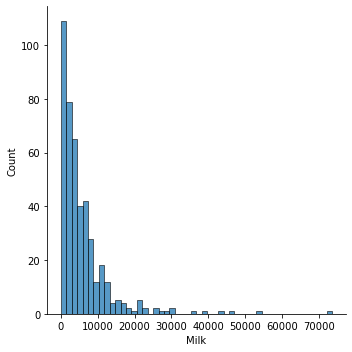

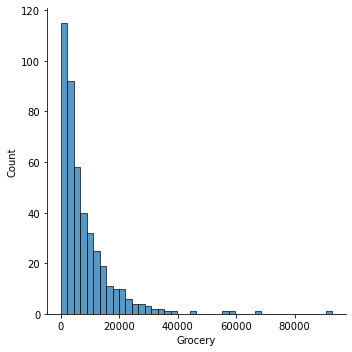

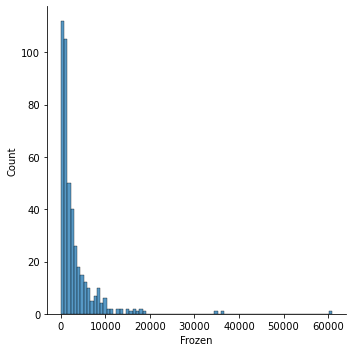

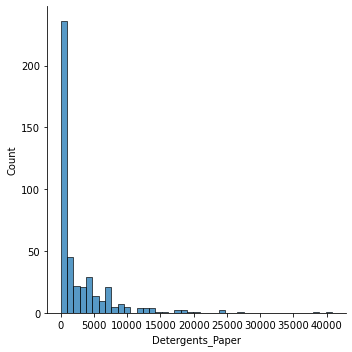

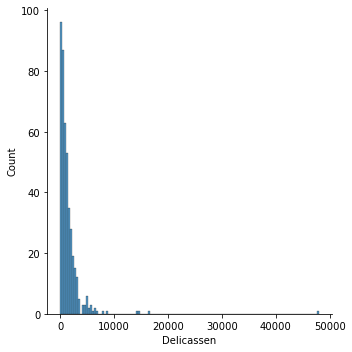

In [7]:
for i,f in enumerate(features):
    plt.figure(i)
    sns.displot(data = df, x =f )

<AxesSubplot:>

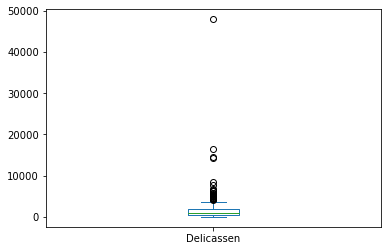

In [8]:
df['Delicassen'].plot(kind = 'box')

In [9]:
df[df['Delicassen']>1820]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
7,2,3,7579,4956,9426,1669,3321,2566
9,2,3,6006,11093,18881,1159,7425,2098
12,2,3,31714,12319,11757,287,3881,2931
...,...,...,...,...,...,...,...,...
430,1,3,3097,4230,16483,575,241,2080
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867


In [10]:
df['Total'] = df.iloc[:,2:-1].sum(axis =1)
# total column to sum the prices of all items

In [11]:
df.groupby(by =[ 'Channel', 'Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
Channel Region                                                               
1       1          59    59       59      59                59          59   
        2          28    28       28      28                28          28   
        3         211   211      211     211               211         211   
2       1          18    18       18      18                18          18   
        2          19    19       19      19                19          19   
        3         105   105      105     105               105         105   

                Total  
Channel Region         
1       1          59  
        2          28  
        3         211  
2       1          18  
        2          19  
        3         105

In [12]:
df.groupby(by =[ 'Channel', 'Region'])['Total'].describe()

count          mean           std      min       25%      50%  \
Channel Region                                                                  
1       1        59.0  24876.440678  15703.993992   4907.0  15106.50  21163.0   
        2        28.0  24578.035714  21719.061431   3607.0  15967.00  21409.5   
        3       211.0  25695.350711  21439.527314    896.0  12503.00  19170.0   
2       1        18.0  45265.333333  23213.332660  16982.0  29594.75  39931.0   
        2        19.0  42757.736842  22799.301000  17344.0  28716.00  34422.0   
        3       105.0  45178.761905  30610.688608  14776.0  28770.00  35409.0   

                    75%       max  
Channel Region                     
1       1       28461.5   69922.0  
        2       27964.5  125268.0  
        3       32076.5  181619.0  
2       1       52083.0  104285.0  
        2       49862.0  119076.0  
        3       49626.0  196947.0

In [13]:
# add category percentage for each record
cats = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for f in cats:
    df[f+'%'] = df[f]*100/df['Total']
df    

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Fresh%,Milk%,Grocery%,Frozen%,Detergents_Paper%,Delicassen%
0,2,3,12669,9656,7561,214,2674,1338,32774,38.655642,29.462379,23.070117,0.652957,8.158906,4.082504
1,2,3,7057,9810,9568,1762,3293,1776,31490,22.410289,31.152747,30.384249,5.595427,10.457288,5.639886
2,2,3,6353,8808,7684,2405,3516,7844,28766,22.085100,30.619481,26.712091,8.360565,12.222763,27.268303
3,1,3,13265,1196,4221,6404,507,1788,25593,51.830579,4.673153,16.492791,25.022467,1.981010,6.986285
4,2,3,22615,5410,7198,3915,1777,5185,40915,55.273127,13.222535,17.592570,9.568618,4.343150,12.672614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,71098,41.777546,16.949844,22.542125,18.474500,0.255985,3.099947
436,1,3,39228,1431,764,4510,93,2346,46026,85.230087,3.109112,1.659931,9.798809,0.202060,5.097119
437,2,3,14531,15488,30243,437,14841,1867,75540,19.236166,20.503045,40.035743,0.578501,19.646545,2.471538
438,1,3,10290,1981,2232,1038,168,2125,15709,65.503851,12.610605,14.208416,6.607677,1.069451,13.527277


In [14]:
df.isna().sum()

Channel              0
Region               0
Fresh                0
Milk                 0
Grocery              0
Frozen               0
Detergents_Paper     0
Delicassen           0
Total                0
Fresh%               0
Milk%                0
Grocery%             0
Frozen%              0
Detergents_Paper%    0
Delicassen%          0
dtype: int64

## 2. Try out different clustering models in the Whole sale customer dataset. 3.Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

### 1.Clustering with ratios

In [15]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Total', 'Fresh%', 'Milk%',
       'Grocery%', 'Frozen%', 'Detergents_Paper%', 'Delicassen%'],
      dtype='object')

In [16]:
df1 = df[['Fresh%', 'Milk%','Grocery%', 'Frozen%', 'Detergents_Paper%', 'Delicassen%']]
df1.head()

,Fresh%,Milk%,Grocery%,Frozen%,Detergents_Paper%,Delicassen%
0,38.655642,29.462379,23.070117,0.652957,8.158906,4.082504
1,22.410289,31.152747,30.384249,5.595427,10.457288,5.639886
2,22.085100,30.619481,26.712091,8.360565,12.222763,27.268303
3,51.830579,4.673153,16.492791,25.022467,1.981010,6.986285
4,55.273127,13.222535,17.592570,9.568618,4.343150,12.672614


In [17]:
df1.shape

(440, 6)

In [18]:
X1 = df1.values
X1.shape

(440, 6)

### KMeans clustering

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
n =np.arange(3,8)
for i in n:
    model = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    model.fit(X1)
    y = model.fit_predict(X1)
    wcss.append(model.inertia_)
    print( print('n: {}, wcss: {} , Silhouette Score:  {}'.format(i, wcss[i-3],silhouette_score(X1, y))))
    


n: 3, wcss: 185262.76217758097 , Silhouette Score:  0.3643572043437108
None
n: 4, wcss: 151128.51143238242 , Silhouette Score:  0.3720908350560482
None
n: 5, wcss: 126133.12603173187 , Silhouette Score:  0.35980879303616625
None
n: 6, wcss: 111203.81980790026 , Silhouette Score:  0.34530402117837683
None
n: 7, wcss: 98407.28179430992 , Silhouette Score:  0.3284135375147367
None


As per the above analysis, n =4 is giving the best results, followed by 3, 5,6,7.

### Understanding results.

In [20]:
# for 4 clusters
nclust=[4,3,5]
ypred = {}
for n in nclust:
    model = KMeans(n_clusters = n, init ='k-means++', random_state = 42)
    model.fit(X1)
    y = model.fit_predict(X1)
    ypred['cluster'+str(n)] = y

In [21]:
for y in ypred:
    df1[y] = ypred[y]
df1.head()    

C:\Users\zacha\AppData\Local\Temp/ipykernel_10024/1919858997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[y] = ypred[y]


,Fresh%,Milk%,Grocery%,Frozen%,Detergents_Paper%,Delicassen%,cluster4,cluster3,cluster5
0,38.655642,29.462379,23.070117,0.652957,8.158906,4.082504,0,2,3
1,22.410289,31.152747,30.384249,5.595427,10.457288,5.639886,1,1,0
2,22.085100,30.619481,26.712091,8.360565,12.222763,27.268303,0,1,0
3,51.830579,4.673153,16.492791,25.022467,1.981010,6.986285,3,2,1
4,55.273127,13.222535,17.592570,9.568618,4.343150,12.672614,2,2,3


In [22]:
df1.groupby('cluster4')['Fresh%', 'Milk%','Grocery%', 'Frozen%', 'Detergents_Paper%', 'Delicassen%'].mean().T

C:\Users\zacha\AppData\Local\Temp/ipykernel_10024/3669842606.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('cluster4')['Fresh%', 'Milk%','Grocery%', 'Frozen%', 'Detergents_Paper%', 'Delicassen%'].mean().T


cluster4,0,1,2,3
Fresh%,39.542393,10.138204,69.165368,35.847422
Milk%,20.908506,27.734410,8.102775,12.640523
Grocery%,25.291414,41.240236,10.790842,14.754534
Frozen%,6.524907,4.829868,10.053455,34.147121
Detergents_Paper%,7.732781,16.057282,1.887561,2.610401
Delicassen%,7.649777,4.603505,4.146246,5.772773


In [23]:
df1.groupby('cluster3')['Fresh%', 'Milk%','Grocery%', 'Frozen%', 'Detergents_Paper%', 'Delicassen%'].mean().T

C:\Users\zacha\AppData\Local\Temp/ipykernel_10024/3053125322.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('cluster3')['Fresh%', 'Milk%','Grocery%', 'Frozen%', 'Detergents_Paper%', 'Delicassen%'].mean().T


cluster3,0,1,2
Fresh%,70.295887,12.501685,41.334807
Milk%,7.933877,27.435854,15.583642
Grocery%,10.740131,39.362643,18.942547
Frozen%,9.207760,5.394930,19.656776
Detergents_Paper%,1.822345,15.304888,4.482228
Delicassen%,4.100673,5.388595,6.223824


In [24]:
df1.groupby('cluster5')['Fresh%', 'Milk%','Grocery%', 'Frozen%', 'Detergents_Paper%', 'Delicassen%'].mean().T

C:\Users\zacha\AppData\Local\Temp/ipykernel_10024/1983246502.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby('cluster5')['Fresh%', 'Milk%','Grocery%', 'Frozen%', 'Detergents_Paper%', 'Delicassen%'].mean().T


cluster5,0,1,2,3,4
Fresh%,15.874519,40.010675,70.217851,41.824909,9.438021
Milk%,39.377614,10.555394,7.992140,18.269236,23.235636
Grocery%,26.915133,13.834098,10.678092,25.826738,44.969045
Frozen%,10.652302,33.141672,9.224087,5.971056,3.852985
Detergents_Paper%,7.180432,2.458161,1.887831,8.108060,18.504313
Delicassen%,10.422905,4.947752,3.984708,5.856630,4.039691


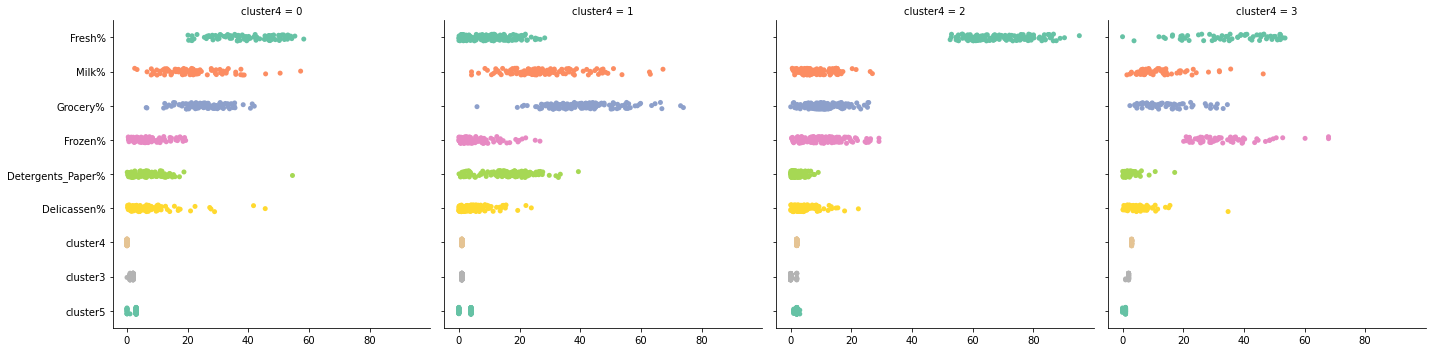

In [25]:
sns.catplot(data=df1,orient ='h' , palette="Set2", col = 'cluster4')

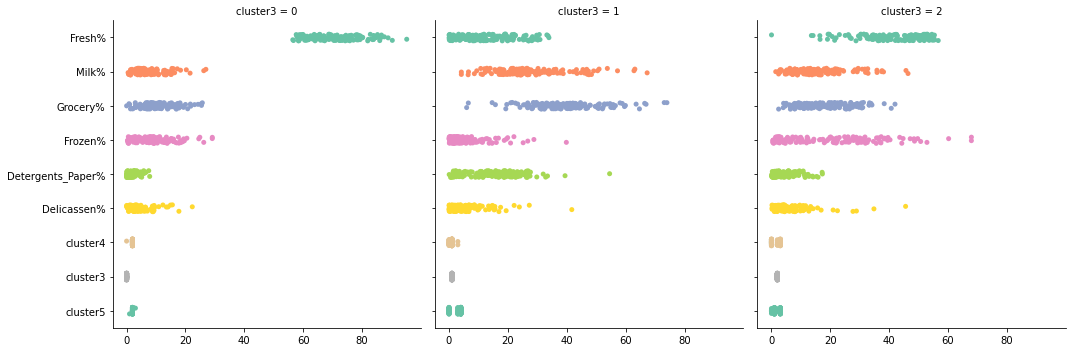

In [26]:
sns.catplot(data=df1,orient ='h' , palette="Set2", col = 'cluster3')

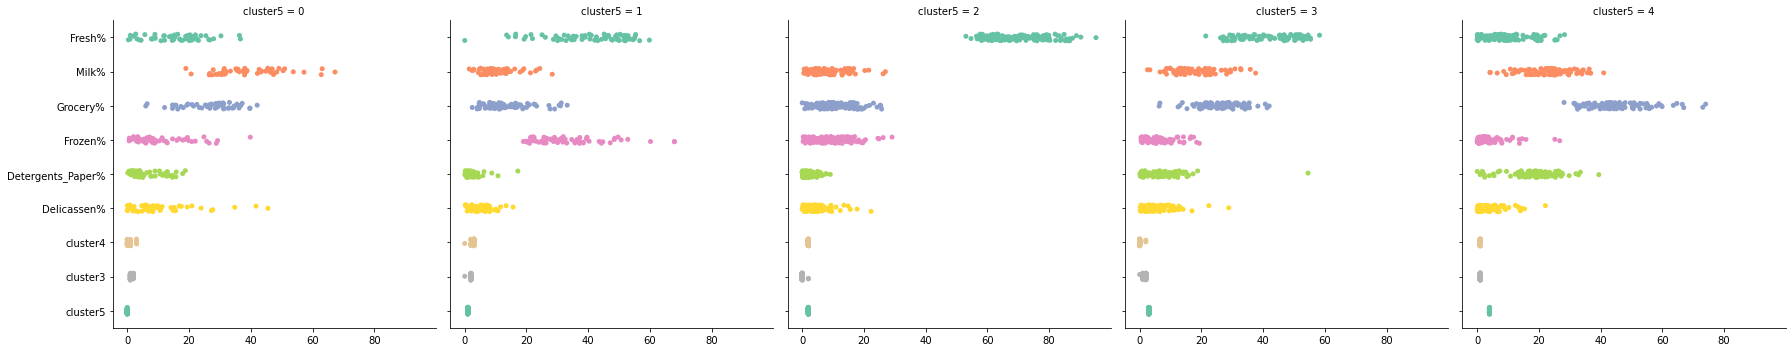

In [27]:
sns.catplot(data=df1,orient ='h' , palette="Set2", col = 'cluster5')

### Clustering without delicassen.

Delicassen column has many outliers.It can be grouped as a seperate cluster. For further analysis we can drop delicassen column

In [28]:
df2 = df[['Fresh%', 'Milk%','Grocery%', 'Frozen%', 'Detergents_Paper%']]

In [29]:
df2.shape

(440, 5)

In [30]:
X2 = df2.values
X2.shape


(440, 5)

## KMeans clustering without considering 'Delicassen'

In [31]:
wcss = []
n =np.arange(3,8)
for i in n:
    model = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    model.fit(X2)
    y = model.fit_predict(X2)
    wcss.append(model.inertia_)
    print( print('n: {}, wcss: {} , Silhouette Score:  {}'.format(i, wcss[i-3],silhouette_score(X2, y))))

n: 3, wcss: 172391.2398756573 , Silhouette Score:  0.37841161608084495
None
n: 4, wcss: 138415.05544714705 , Silhouette Score:  0.3827256745385162
None
n: 5, wcss: 114563.16696509765 , Silhouette Score:  0.36939716953378027
None
n: 6, wcss: 99687.70365507899 , Silhouette Score:  0.3507526705163483
None
n: 7, wcss: 86990.0837929207 , Silhouette Score:  0.34656651073369366
None


As per the above data, n = 4 has best score, followed by 3,5,6,7

## HC clustering with original values on Channel 2 Region 3

We will consider channel 2 region 3 for HC cluster analysis.We can understand dendogram clearly if the datapoints are less.

In [32]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Total', 'Fresh%', 'Milk%',
       'Grocery%', 'Frozen%', 'Detergents_Paper%', 'Delicassen%'],
      dtype='object')

In [33]:
df3 = df[(df['Channel']==2) & (df['Region']==3)][['Fresh', 'Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
df3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
...,...,...,...,...,...,...
418,660,8494,18622,133,6740,776
421,17063,4847,9053,1031,3415,1784
423,17565,3686,4657,1059,1803,668
424,16980,2884,12232,874,3213,249


In [34]:
X3 =df3.values
X3.shape

(105, 6)

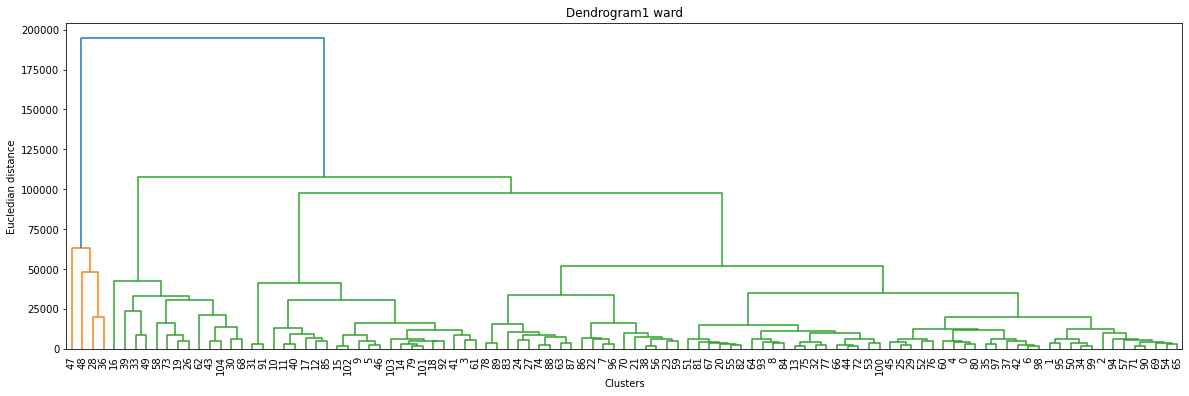

In [35]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20,6))
dendrogram1 = sch.dendrogram(sch.linkage(X3,method ='ward'))
plt.title('Dendrogram1 ward')
plt.xlabel('Clusters')
plt.xticks(fontsize =10)
plt.ylabel('Eucledian distance')
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering
nc= np.arange(3,8)
for n in nc:
    hc1 = AgglomerativeClustering(n_clusters = n, affinity ='euclidean', linkage ='ward')
    y_hc1 = hc1.fit_predict(X3)
    print('Silhouette Score(n={}): {}'.format(n,silhouette_score(X3, y_hc1)))

Silhouette Score(n=3): 0.4544213441147491
Silhouette Score(n=4): 0.3759369295690547
Silhouette Score(n=5): 0.37459436953784947
Silhouette Score(n=6): 0.28605536231384876
Silhouette Score(n=7): 0.2873638109446867


In [37]:
#n = 3 has the best score.
hc1 = AgglomerativeClustering(n_clusters = 3, affinity ='euclidean', linkage ='ward')
y_hc1 = hc1.fit_predict(X3)

In [38]:
df3['cluster3'] = y_hc1
df3.groupby('cluster3')['Fresh', 'Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'].mean().T

C:\Users\zacha\AppData\Local\Temp/ipykernel_10024/3407015213.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3.groupby('cluster3')['Fresh', 'Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'].mean().T


cluster3,0,1,2
Fresh,9124.215909,29862.50,8455.923077
Milk,7580.806818,53080.75,21044.000000
Grocery,12075.954545,60015.75,28646.384615
Frozen,1421.181818,3262.25,1597.923077
Detergents_Paper,5171.545455,27942.25,12119.615385
Delicassen,1473.272727,3082.25,3828.846154


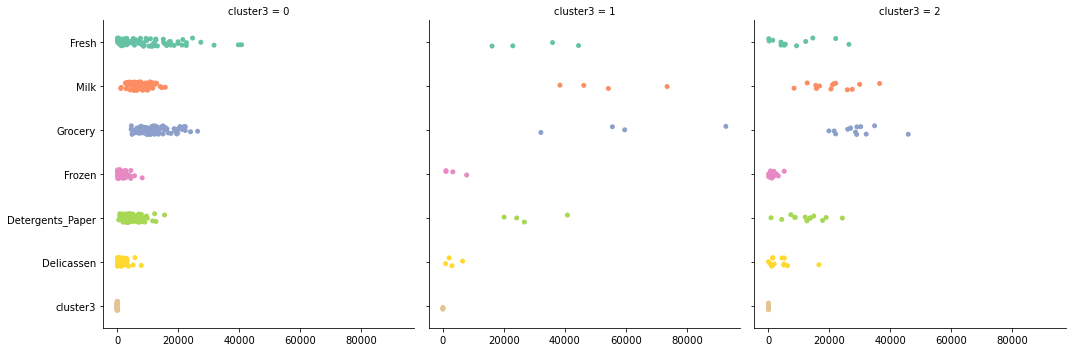

In [39]:
sns.catplot(data=df3,orient ='h' , palette="Set2", col = 'cluster3')

## Conclusion

We have identified 3 clusters based on HC clustering.
* Category 0 : All items in low sales .
* Category 1: All except Frozen,Delicassen in High  sales.
* Category 2: All in the mid range.

## Using PCA

In [40]:
from sklearn.decomposition import PCA

In [41]:
dfpca = pd.read_csv('Wholesale customers data.csv')

In [42]:
dfpca.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [43]:
# feature scale before PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = sc.fit_transform(dfpca[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])
df1 = pd.DataFrame(df1)
df1.head()

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [44]:
pca = PCA(.9)
pca.fit(df1)
pca = PCA(n_components = 3)
pca.fit(df1)
x_pca = pca.transform(df1)
x_pca

array([[ 0.19329055, -0.30509996, -0.14087845],
       [ 0.4344199 , -0.32841262,  0.31900662],
       [ 0.81114323,  0.8150957 ,  1.52341562],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141],
       [-0.91802273, -0.03004659,  0.25840805],
       [-1.10513709, -0.86133787,  0.30515404]])

In [45]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  , 0.12334413])

In [46]:
sum([0.44082893, 0.283764  , 0.12334413])

0.84793706

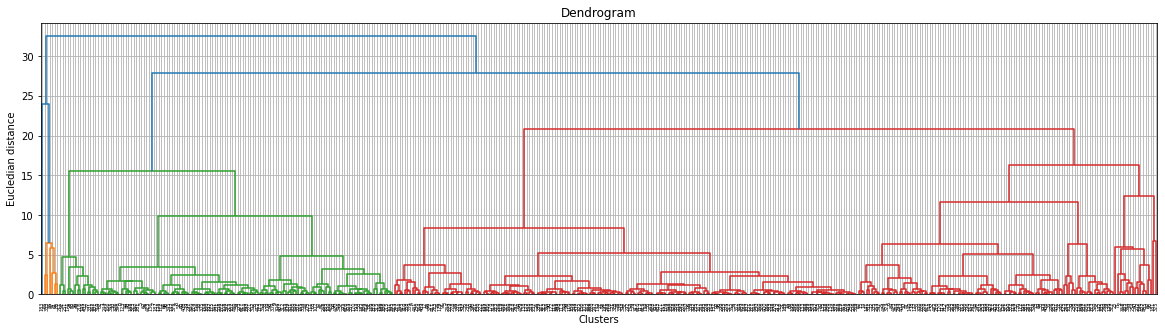

In [47]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20,5))
dendrogram = sch.dendrogram(sch.linkage(x_pca,method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Eucledian distance')
plt.grid()
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering
nc= np.arange(3,8)
for n in nc:
    hc1 = AgglomerativeClustering(n_clusters = n, affinity ='euclidean', linkage ='ward')
    y_hc1 = hc1.fit_predict(x_pca)
    print('Silhouette Score(n={}): {}'.format(n,silhouette_score(x_pca, y_hc1)))

Silhouette Score(n=3): 0.3404698208702491
Silhouette Score(n=4): 0.3426760710535858
Silhouette Score(n=5): 0.30561874564871266
Silhouette Score(n=6): 0.32035021997571017
Silhouette Score(n=7): 0.33039643858848394


In [49]:
wcss = []
n =np.arange(3,8)
for i in n:
    model = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    model.fit(x_pca)
    y = model.fit_predict(x_pca)
    wcss.append(model.inertia_)
    print( print('n: {}, wcss: {} , Silhouette Score:  {}'.format(i, wcss[i-3],silhouette_score(x_pca, y))))

n: 3, wcss: 1210.3715183835418 , Silhouette Score:  0.5726090020738704
None
n: 4, wcss: 915.8943764865463 , Silhouette Score:  0.4034921819516757
None
n: 5, wcss: 677.5074207203327 , Silhouette Score:  0.427937798163151
None
n: 6, wcss: 568.9637589437926 , Silhouette Score:  0.3753692020832657
None
n: 7, wcss: 486.11999651648847 , Silhouette Score:  0.3653125562575955
None


KMeans with n =  3 has a better score.